# Assignment 3

 In this Assignment, we will use CNN to classify digits.   
The `MNIST` database is a large database of handwritten digits that is commonly used for training various image processing systems.



## Importing TensorFlow

In [84]:
import tensorflow as tf

## Get the dataset

In [85]:
# Import the dataset

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [86]:
# Split the dataset

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x_test,y_test,test_size=0.2)

In [4]:
# Pre processing 
X_train, X_test = X_train / 255.0, X_test / 255.0

## Visualize the dataset
Print some images with labels.

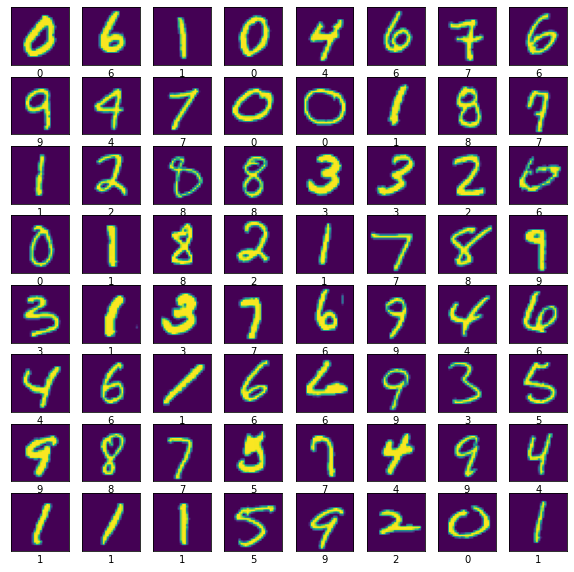

In [87]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(64):
            plt.subplot(8,8,i+1)
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)
            plt.imshow(X_train[i])
            plt.xlabel(Y_train[i],fontsize=10)
plt.show()
# Your code

Plot statistics of the training and testing dataset  
(`x axis`: digits, `y axis`: number of samples corresponding to the digits)

In [88]:
import numpy as np
# Your code
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
(8000, 28, 28)
(2000, 28, 28)
(8000,)
(2000,)


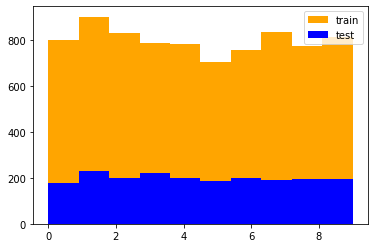

In [89]:
plt.hist(Y_train,color='orange',label='train')
plt.hist(Y_test,color='blue',label='test')
plt.legend()
plt.show()

## Model

In [90]:
# model building

# You are supposed to look at some CNN architectures and add convolutional layers along with MaxPooling, specifying the kernel size, pooling size, activation 
from tensorflow.keras import datasets, layers, models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 128)       36992     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 128)      0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 12, 12, 128)       0         
                                                                 
 flatten_4 (Flatten)         (None, 18432)             0         
                                                                 
 dense_8 (Dense)             (None, 512)               9437696   
                                                      

In [91]:
# Compile the model (add optimizers and metrics)
model.compile(optimizer='adam',
                     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                   metrics=['accuracy'])

In [92]:
# Fit the model on the training data (specify validation_split, read about validation if new to you)
history = model.fit(X_train, Y_train, epochs=10,
                            validation_data=(X_test, Y_test))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


250/250 [==============================] - 2s 7ms/step - loss: 3.5620 - accuracy: 0.8708 - val_loss: 0.1295 - val_accuracy: 0.9570
Epoch 2/10
250/250 [==============================] - 2s 7ms/step - loss: 0.1539 - accuracy: 0.9511 - val_loss: 0.1326 - val_accuracy: 0.9585
Epoch 3/10
250/250 [==============================] - 2s 6ms/step - loss: 0.0931 - accuracy: 0.9694 - val_loss: 0.1332 - val_accuracy: 0.9635
Epoch 4/10
250/250 [==============================] - 2s 7ms/step - loss: 0.0912 - accuracy: 0.9720 - val_loss: 0.1361 - val_accuracy: 0.9655
Epoch 5/10
250/250 [==============================] - 2s 7ms/step - loss: 0.0611 - accuracy: 0.9795 - val_loss: 0.1529 - val_accuracy: 0.9650
Epoch 6/10
250/250 [==============================] - 2s 6ms/step - loss: 0.0653 - accuracy: 0.9809 - val_loss: 0.1284 - val_accuracy: 0.9675
Epoch 7/10
250/250 [==============================] - 2s 7ms/step - loss: 0.0452 - accuracy: 0.9874 - val_loss: 0.1309 - val_accuracy: 0.9710
Epoch 8/10
250/25

63/63 [==============================] - 0s 4ms/step - loss: 0.1304 - accuracy: 0.9720


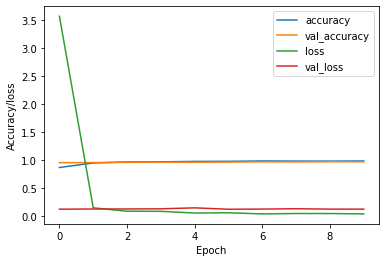

In [93]:
# Evaluate the model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/loss')
plt.legend()
test_loss, test_acc = model.evaluate(X_test,  Y_test)

## Predict some images
Print the image along with its label (true value) and predicted value.

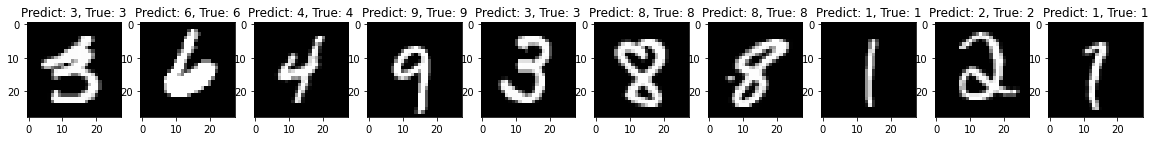

In [95]:
y_pred=model.predict(X_test[:64])
y_pred=np.argmax(y_pred, axis=1)
fig, axis = plt.subplots(1, 10, figsize=(20,20))
for i in range(0, 10):
      axis[i].imshow(X_test[i], cmap='gray')
      axis[i].set_title("Predict: {}, True: {}".format(y_pred[i], Y_test[i]), fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)